In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv') 

In [3]:
data['healthy'] = (data['calories'] < 120).astype(int)

features = ['calories', 'protein', 'fat']
X = data[features]
y = data['healthy']

print(y.value_counts())

healthy
0    937
1    282
Name: count, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_train_scaled_df['healthy'] = y_train.values

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)
X_test_scaled_df['healthy'] = y_test.values

print("Training Set After Scaling (Transformed):")
print(X_train_scaled_df.sample(5))

print("\nTesting Set After Scaling (Transformed):")
print(X_test_scaled_df.sample(5))

Training Set After Scaling (Transformed):
     calories   protein       fat  healthy
374  0.897327  1.480119  2.878190        0
305 -0.165505  2.533371  0.393360        0
384 -0.460427 -1.363661  0.346615        0
860  0.980796 -0.346980  0.636922        0
238 -0.354700  0.938864  0.454865        0

Testing Set After Scaling (Transformed):
     calories   protein       fat  healthy
50   0.880634  1.175846  0.155948        0
235 -0.710833  0.687254 -0.409905        0
239 -0.716397  0.883276  0.335544        0
64   1.014183 -1.074017  0.208843        0
108  0.697003  2.006745  2.878190        0


In [6]:
X_train_df = pd.DataFrame(X_train, columns=features)
X_train_df['healthy'] = y_train.values

X_test_df = pd.DataFrame(X_test, columns=features)
X_test_df['healthy'] = y_test.values

print("Training Set Sample:")
print(X_train_df.sample(5))

print("\nTesting Set Sample:")
print(X_test_df.sample(5))

Training Set Sample:
      calories  protein    fat  healthy
200      167.0    14.30   7.14        0
1196     250.0    13.02   9.27        0
18        71.0     3.33   3.75        1
259      390.0     8.26   1.83        0
1210     457.0     7.00  12.29        0

Testing Set Sample:
      calories  protein    fat  healthy
73       545.0    18.04  32.10        0
1025     336.0     3.98  12.89        0
1101     233.0     7.23   5.57        0
673      382.0     1.65   0.20        0
579      500.0    27.80  32.10        0


In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

Confusion Matrix - Random Forest Classifier:
[[188   0]
 [  0  56]]

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        56

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



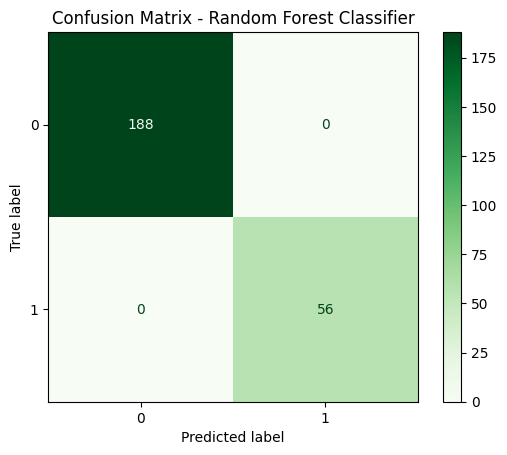

In [8]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print("Confusion Matrix - Random Forest Classifier:")
print(cm_rf)

print("\nClassification Report - Random Forest Classifier:")
print(cr_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()